<a href="https://colab.research.google.com/github/yeyevtushenko/AI/blob/Lesson06.03.2024/Lesson06_03_2024_AI_H_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds.csv", index_col='Unnamed: 0')

In [3]:
df.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


# Завдання 1
Очистіть дані від викидів, виведіть основні числові характеристики та намалюйте точкову діаграму

In [4]:
df.shape

(53940, 2)

In [5]:
num_columns = df.select_dtypes(include="number").columns
sales_num = df[num_columns]

q1 = sales_num.quantile(q=0.25)
q3 = sales_num.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (sales_num >= lower) & (sales_num <= upper)
mask = mask.all(axis=1)

df = df[mask]

In [7]:
df.shape

(50185, 2)

In [8]:
df.describe()

,carat,price
count,50185.000000,50185.000000
mean,0.717443,3131.470599
std,0.372202,2734.453377
min,0.200000,326.000000
25%,0.380000,907.000000
50%,0.670000,2137.000000
75%,1.010000,4635.000000
max,2.000000,11883.000000


<Axes: xlabel='carat', ylabel='price'>

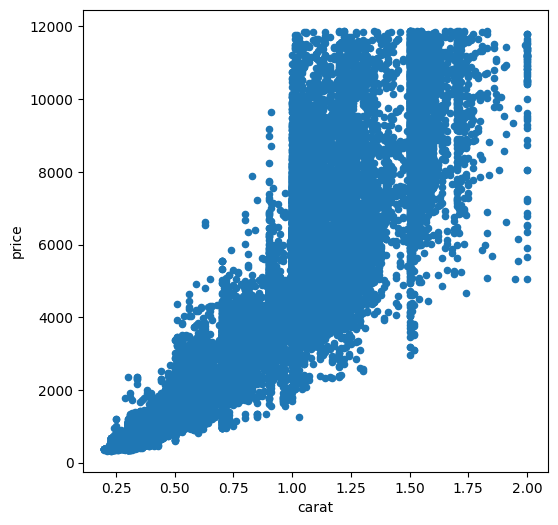

In [9]:
df.plot(kind='scatter', x="carat", y="price", figsize=(6,6))

# Завдання 2
Розділіть дані на залежну y та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [10]:
y = df["price"]
X = df.drop(columns=["price"])
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)


all_metrics = pd.DataFrame()


all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

all_metrics

,train,test
MAE,709.44,704.17
MSE,1171871.56,1136269.34
RMSE,1082.53,1065.96
R2,0.84,0.85


# Завдання 4
Напишіть рівняння регресії за прикладом:
Бал_літній = 1.02*Бал_зимовий -15.6

In [15]:
print(model.coef_)
print(model.intercept_)

#6746 * carat - 1709.6795724782546

[6746.65854978]
-1709.6795724782546


# Завдання 5 (оптимально)
Додайте в таблицю новий стовпчик carat**2. Знову натренуйте модель та напишіть рівняння регресії. Порівняйте дві моделі за метриками

In [16]:
df["carat**2"] = df["carat"] ** 2

In [17]:
df.head()

,carat,price,carat**2
0,0.23,326,0.0529
1,0.21,326,0.0441
2,0.23,327,0.0529
3,0.29,334,0.0841
4,0.31,335,0.0961


In [18]:
y = df["price"]
X = df.drop(columns=["price"])
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
all_metrics = pd.DataFrame()


all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

all_metrics

,train,test
MAE,664.78,658.54
MSE,1149372.01,1107435.48
RMSE,1072.09,1052.35
R2,0.85,0.85


In [21]:
print(model.coef_)
print(model.intercept_)

# 5023.69497984 * carat + 1022.25481113 * carat 2 − 1141.4520516288426

[5023.69497984 1022.25481113]
-1141.4520516288426
